In [1]:
#-------------------------------------------------------------------------------------------------------------------------#
#
#                     MOVIES INDUSTRY PROJECT - EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION
#
#-------------------------------------------------------------------------------------------------------------------------#


import pandas as pd
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading in the data and taking a glimpse at it
df = pd.read_csv(r'C:\Users\admin\Desktop\movies.csv')

# The database contains info about movies released between 1986 and 2020 (mostly in the United States).
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


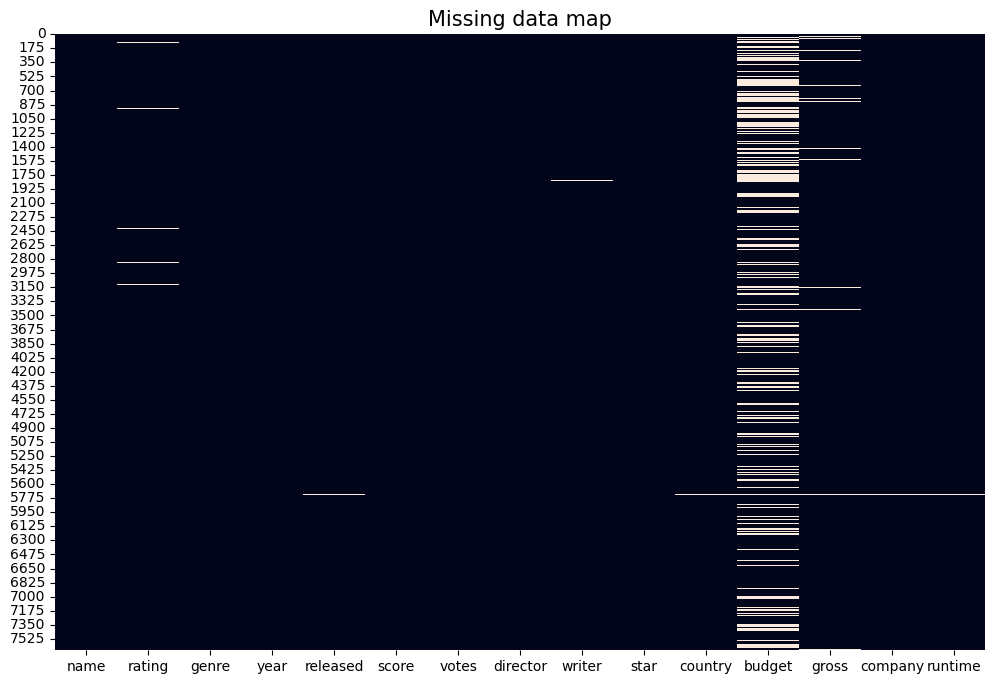

In [3]:
# Visual check for missing values

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False) 
plt.title('Missing data map', fontsize = 15)
plt.show()

In [4]:
# Non-null values count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Percentages of missing values

for col in df.columns:
    rate_missing = np.mean(df[col].isnull())
    print('{} - {}% of values missing'.format(col, round(rate_missing*100,2)))

name - 0.0% of values missing
rating - 1.0% of values missing
genre - 0.0% of values missing
year - 0.0% of values missing
released - 0.03% of values missing
score - 0.04% of values missing
votes - 0.04% of values missing
director - 0.0% of values missing
writer - 0.04% of values missing
star - 0.01% of values missing
country - 0.04% of values missing
budget - 28.31% of values missing
gross - 2.46% of values missing
company - 0.22% of values missing
runtime - 0.05% of values missing


In [6]:
# Getting rid of null values

df_full = df.dropna()

In [7]:
# Checking columns' data types

df_full.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Converting float64 to int64

for col in ['votes', 'budget', 'gross', 'runtime']: 
    df_full[col] = df_full[col].astype('int64')

In [9]:
# There's incoherence between some of the information stored in the 'released' and the 'year' columns.
# To avoid discrepancies in the data I create a new column called 'year_actual',
#    in which I store the correct year of release, exctracted from the 'released' column.

df_full['year_actual'] = ((df_full['released'].str.extract(pat = '([0-9]{4})'))[0]).str.strip()
df_full['year_actual'] = df_full['year_actual'].astype('int64')

df_full.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_actual
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [10]:
# Descriptive statistics for the entire dataset

df_full.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,5421,5336,Hercules,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,5421,10,R,2597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,5421,15,Comedy,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,5421.0,NaN,NaN,NaN,2001.661317,10.540908,1980.0,1993.0,2002.0,2011.0,2020.0
released,5421,2560,"August 26, 2016 (United States)",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,5421.0,NaN,NaN,NaN,6.392455,0.96273,1.9,5.8,6.5,7.1,9.3
votes,5421.0,NaN,NaN,NaN,115066.129127,184407.256946,195.0,19000.0,52000.0,129000.0,2400000.0
director,5421,2063,Woody Allen,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,5421,3205,Woody Allen,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,5421,1845,Nicolas Cage,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


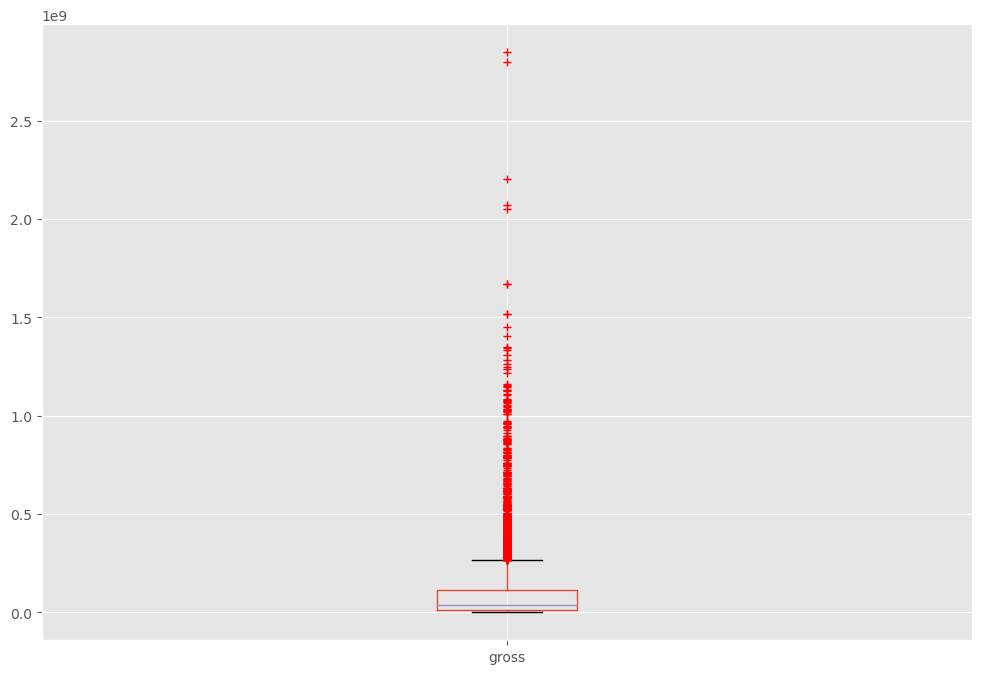

In [11]:
# Summary statistics for the gross revenue data.

with plt.style.context('ggplot'):
    plt.figure(figsize=(12, 8))
    df_full.boxplot(column=['gross'], sym = 'r+')
plt.show()

In [12]:
# Sorting data by gross revenue in a descending order

df_full.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_actual
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [13]:
# INSIGHT: There's a notable amount of outliers.
#          Among them, 5 movies generated outstanding revenue (more than 2 billions USD):
#          Avatar, Avengers: Endgame, Titanic, Star Wars: The Force Awakens, Avengers: Infinity War

In [14]:
# Visualizing the unique values in the 'company' column, to check the quality of data.

df_full['company'].drop_duplicates().sort_values()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
2929                          1492 Pictures
385                        1818 Productions
                       ...                 
6420                                   erbp
6793                             i am OTHER
4007                               i5 Films
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 1475, dtype: object

In [15]:
# INSIGHT: Data is good enough for the use I will make of it; though, defining a standard format would be ideal.
#          There are 1475 different film production companies in the dataset.

In [16]:
# Looking for duplicates.

df_full.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_actual
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [17]:
# INSIGHT: There are no duplicates, since the number of rows in the output matches the number of rows of the dataframe.

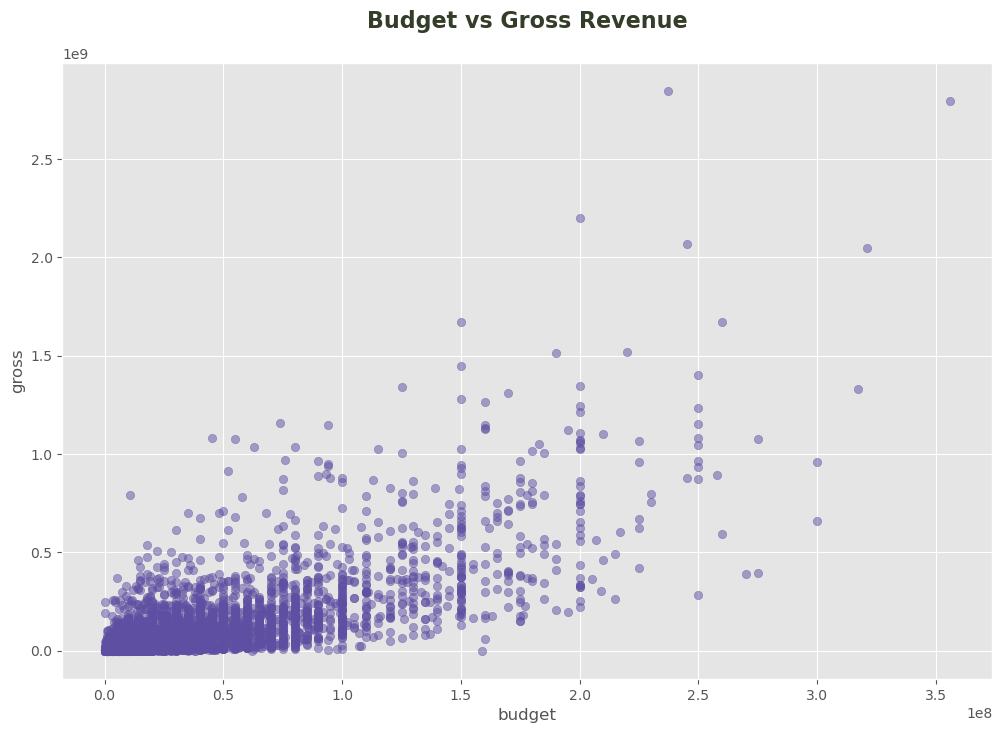

In [18]:
# Visualizing 'budget' vs 'gross' in a scatter plot.

with plt.style.context('ggplot'):
    plt.figure(figsize=(12, 8))
    plt.scatter(x = df_full['budget'], y = df_full['gross'], c=['#5e4fa2'], alpha = 0.5)
plt.title('Budget vs Gross Revenue\n', fontsize=16, weight=600, color='#333d29')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

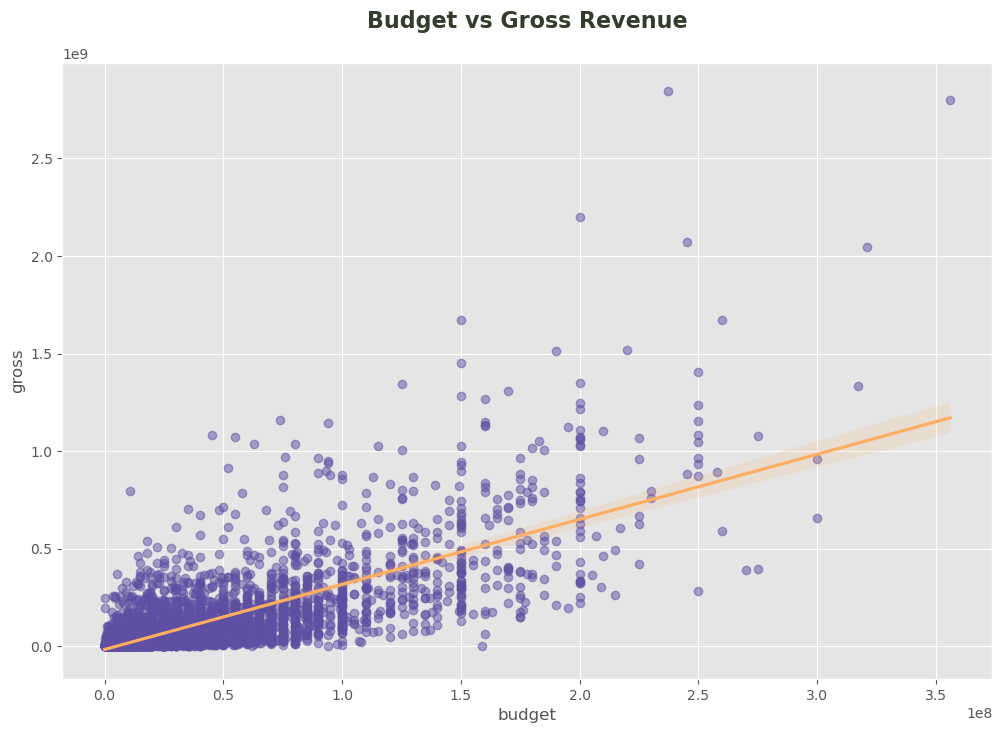

In [19]:
# Visualizing 'budget' vs 'gross' in a regression plot.

with plt.style.context('ggplot'):
    plt.figure(figsize=(12, 8))
    sns.regplot(x = 'budget', y = 'gross', data = df_full, scatter_kws = {'color': '#5e4fa2', 'alpha': 0.5}, line_kws = {'color': '#fdae61'})
plt.title('Budget vs Gross Revenue\n', fontsize=16, weight=600, color='#333d29')    
plt.show()

In [20]:
# INSIGHT: The scatter plot suggests there's some positive correlation between the 2 variables.
#          I investigate better with a regression plot, confirming the positive correlation.
#          Movies with higher production budget are likely to generate higher revenue.

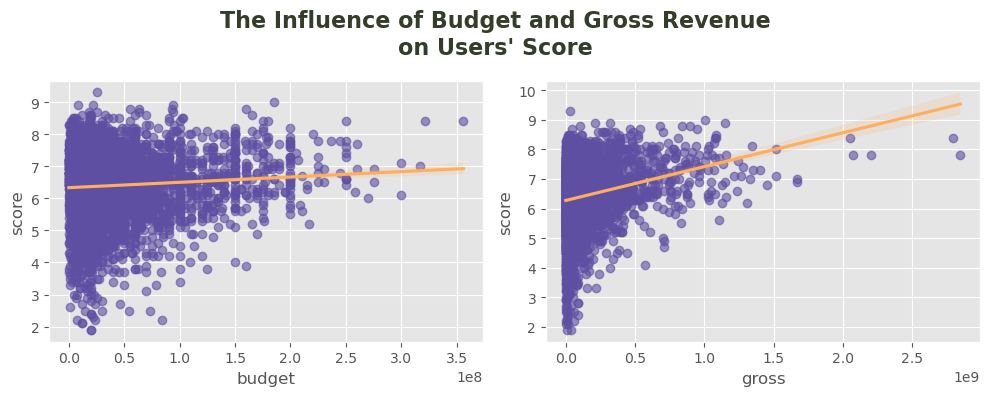

In [21]:
# Visually checking if 'budget' and 'gross' influence the 'score', intended as movie popularity among viewers.

with plt.style.context('ggplot'):    
    fig_influence, axes_influence = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), layout ='tight')   
    plt.suptitle("The Influence of Budget and Gross Revenue\non Users' Score", fontsize=16, weight=600, color='#333d29')
    for i, col in enumerate(['budget', 'gross']):
        sns.regplot(data=df_full, x=col, y='score',
                    scatter_kws={"color": "#5e4fa2", "alpha": 0.6}, line_kws={"color": "#fdae61"}, ax=axes_influence[i])
    plt.show()

In [22]:
#INSIGHT: The production budget of a movie doesn't have almost any impact on it's popularity.
#         The gross revenue generated by a movie just barely influence the final users' score.

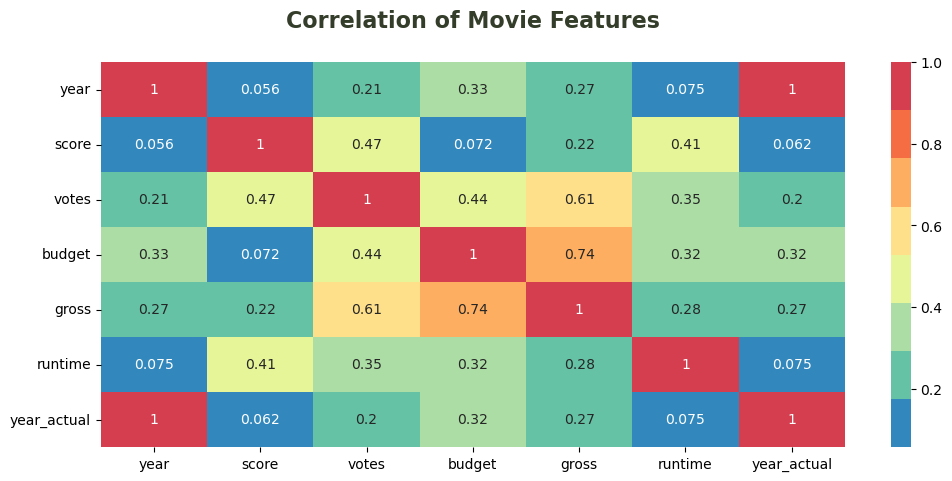

In [23]:
# Looking at the correlation matrix, in search of other factors that can influence the gross revenue of a movie.

corr_matrix = df_full.corr(numeric_only = True)

# Visualizing the correlation matrix as a heat map.

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot = True, cmap=['#3288bd', '#66c2a5', '#abdda4', '#e6f598', '#fee08b', '#fdae61', '#f46d43', '#d53e4f'])
plt.title('Correlation of Movie Features\n', fontsize=16, weight=600, color='#333d29')
plt.show()

In [24]:
# Looking at pairs of variables with high correlation (either positive or negative).

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr_pairs = (sorted_pairs[abs(sorted_pairs) > 0.5])[abs(sorted_pairs) < 1]

high_corr_pairs

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
year_actual  year           0.998726
year         year_actual    0.998726
dtype: float64

In [25]:
# INSIGHT: Excluding the 'year' - 'year_actual' pair (they are substantially the same variable,
#          'budget' - 'gross' is the pair with the highest correlation index.
#          'votes' - 'gross' also has a correlation index above 0.5. It can be interpreted as follow:
#          high number of votes implies high number of views and that can lead to higher revenue.

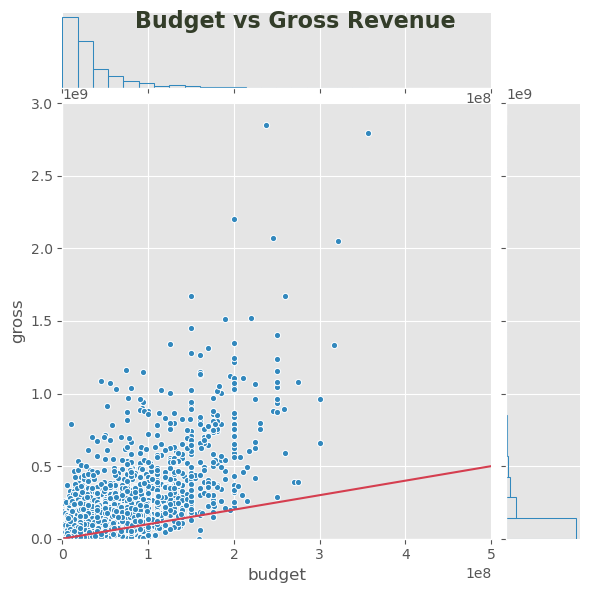

In [26]:
# Movies that make a profit

with plt.style.context('ggplot'):   
    ax_profit = sns.jointplot(data=df_full, x='budget', y='gross',
                               marker=".", s=80, marginal_kws=dict(bins=20, fill=False), color='#3288bd')
    ax_profit.fig.suptitle('Budget vs Gross Revenue', fontsize=16, weight=600, color='#333d29')
    ax_profit.ax_joint.set_xlim(0, 0.5e9)
    ax_profit.ax_joint.set_ylim(0, 3e9)
    ax_profit.ax_joint.axline((1,1), slope=1, color='#d53e4f')
plt.show()

In [27]:
# INSIGHT: Most of the movies lay above the red line; those movies make a profit.

In [28]:
# Looking at the top 10 companies that generated the highest gross revenue overall.

company_revenue = df_full.groupby('company')[["gross"]].sum()
company_revenue_sorted = company_revenue.sort_values('gross', ascending = False)[:10]

company_revenue_sorted

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [29]:
# Looking at the top 3 companies by gross revenue for the past 5 years

company_yearly_revenue = df_full.groupby(['company', 'year_actual'])[["gross"]].sum()
company_yearly_revenue_sorted = company_yearly_revenue.sort_values(by=['year_actual', 'gross'], ascending = False)
company_yearly_revenue_top3 = company_yearly_revenue_sorted.groupby(['year_actual'])[["gross"]].head(3)[:15]

company_yearly_revenue_top3

gross
company                             year_actual            
Beijing Diqi Yinxiang Entertainment 2020          461421559
Columbia Pictures                   2020          426505244
Universal Pictures                  2020          388638753
Walt Disney Pictures                2019         5773131804
Columbia Pictures                   2019         2932757449
Marvel Studios                      2019         2797501328
                                    2018         4018631866
Warner Bros.                        2018         2774168962
Universal Pictures                  2018         2496324416
Walt Disney Pictures                2017         3789382071
Universal Pictures                  2017         2729460672
Warner Bros.                        2017         2417679547
Twentieth Century Fox               2016         2208106248
Universal Pictures                  2016         2174419746
Marvel Studios                      2016         1831133572

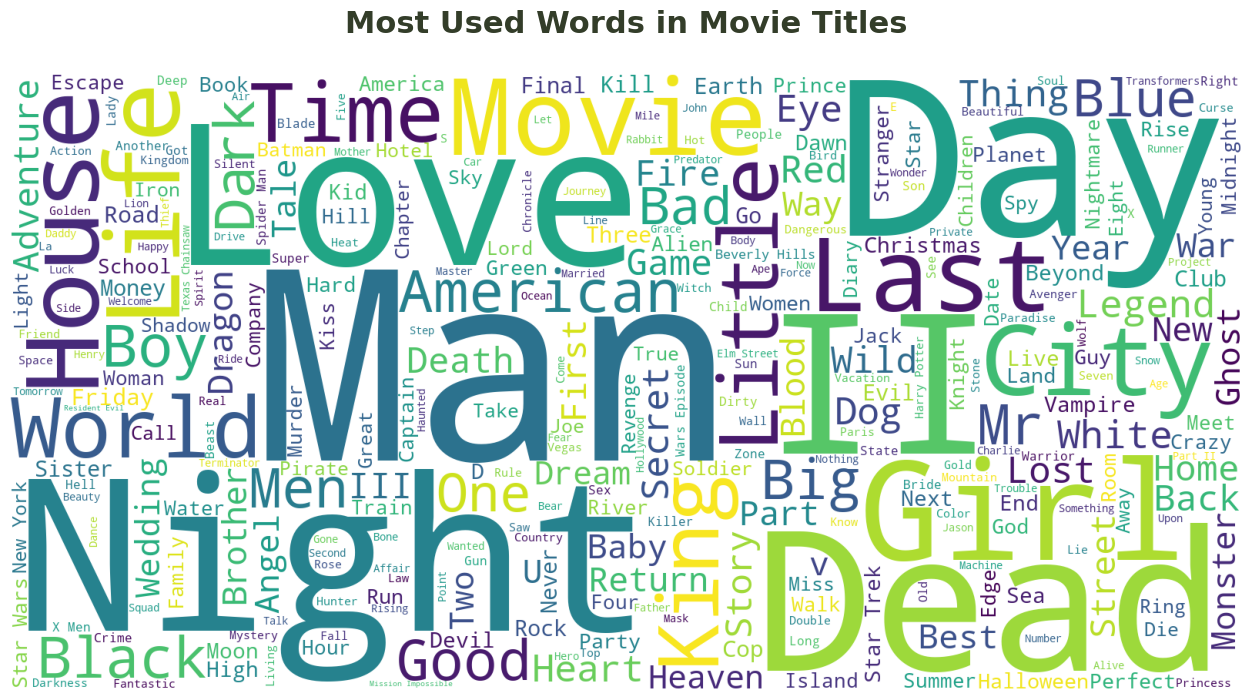

In [30]:
# Looking at the most used words in movie titles.

from wordcloud import WordCloud

wc_titles = WordCloud(max_words=1000, min_font_size=10,
                      height=800,width=1600,background_color="white").generate(' '.join(df_full['name']))

plt.figure(figsize=(20,8))
plt.title('Most Used Words in Movie Titles\n', fontsize=22, weight=600, color='#333d29')
plt.imshow(wc_titles)
plt.axis("off")
plt.show()

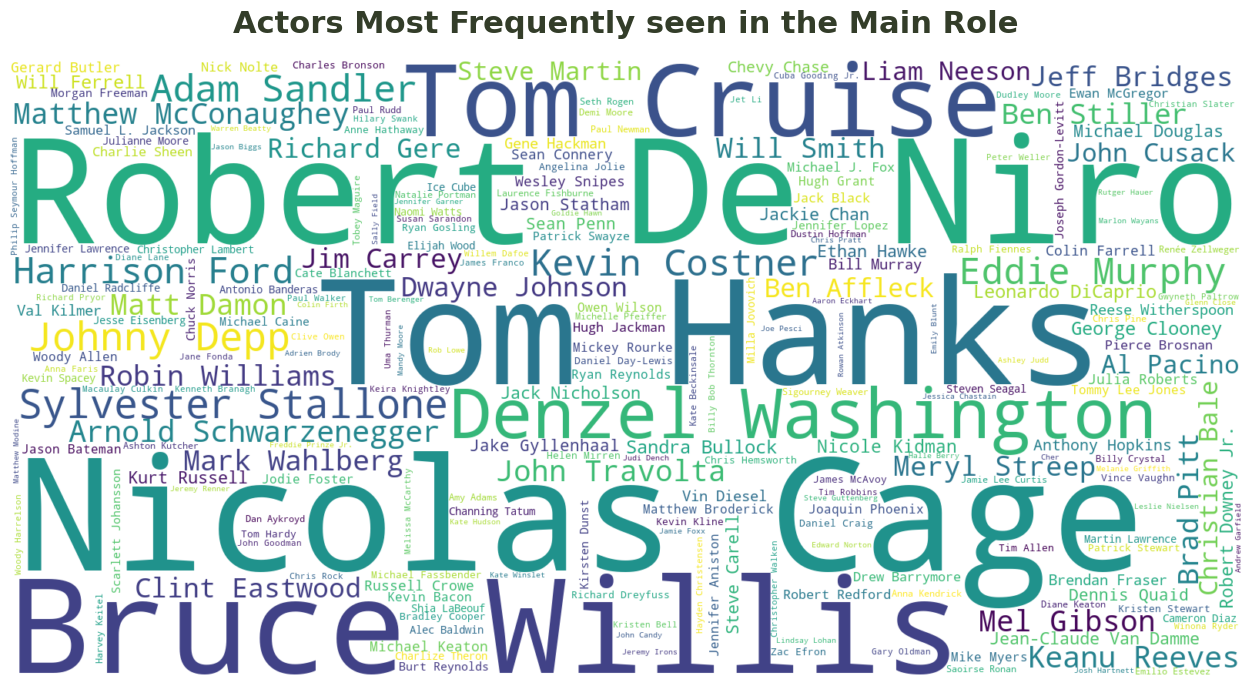

In [31]:
# Looking at the actors who've played the main role more frequently.

stars_list = ', '.join(df_full['star'])
stars_fullname = stars_list.split(', ')

stars_main_freq = {}
for i in range(len(stars_fullname)):
    stars_main_freq[stars_fullname[i]] = len(df_full[df_full['star'] == stars_fullname[i]])

wc_stars = WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='white')
wc_stars.generate_from_frequencies(stars_main_freq)

plt.figure(figsize=(20,8))
plt.title("Actors Most Frequently seen in the Main Role", fontsize=22, weight=600, color='#333d29', pad=20)
plt.imshow(wc_stars, interpolation="bilinear")
plt.axis("off")
plt.show()

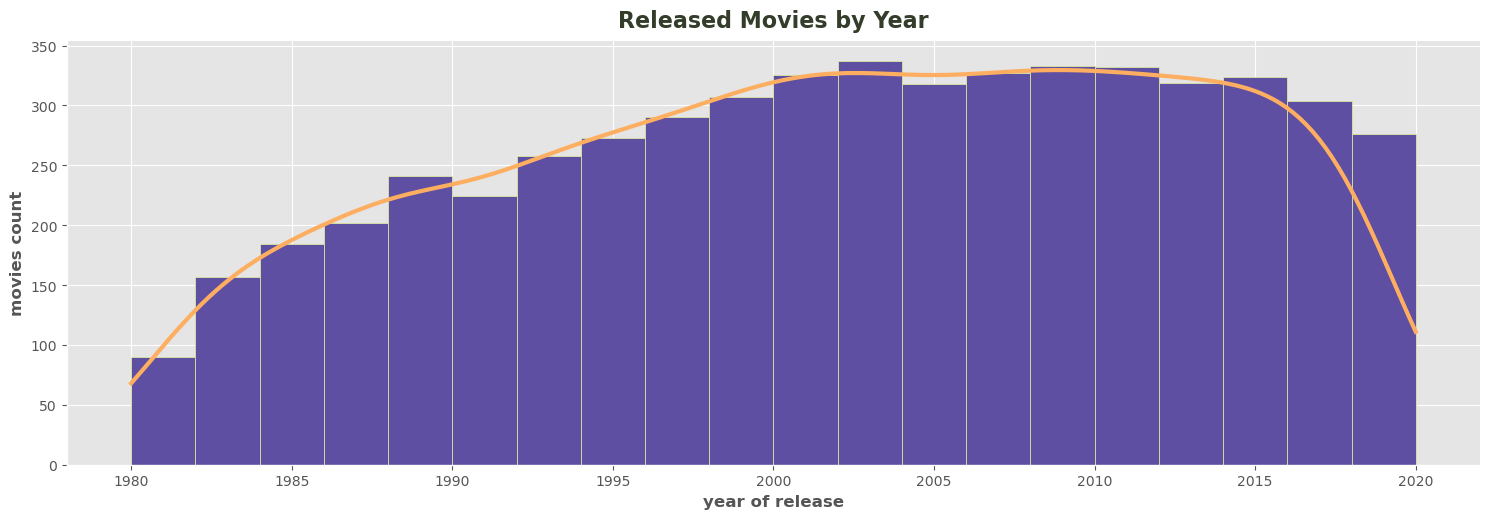

In [32]:
# Movies released over the years

with plt.style.context('ggplot'):   
    sns.displot(data=df_full, x='year_actual', kind='hist', kde=True,
                color='#fdae61', facecolor='#5e4fa2', edgecolor='#e6f598', line_kws={'lw': 3}, aspect=3)
    plt.title('Released Movies by Year', fontsize=16, weight=600, color='#333d29', pad=10)
    plt.xlabel('year of release', weight=550)
    plt.ylabel('movies count', weight=550)
    plt.show()

In [33]:
# INSIGHT: Starting from 1980s, movies industry had grown significantly until the early 2000s, then stabilized.
#          The drop at the end of the plot is due to the lack of data relative to the years 2018-2020.

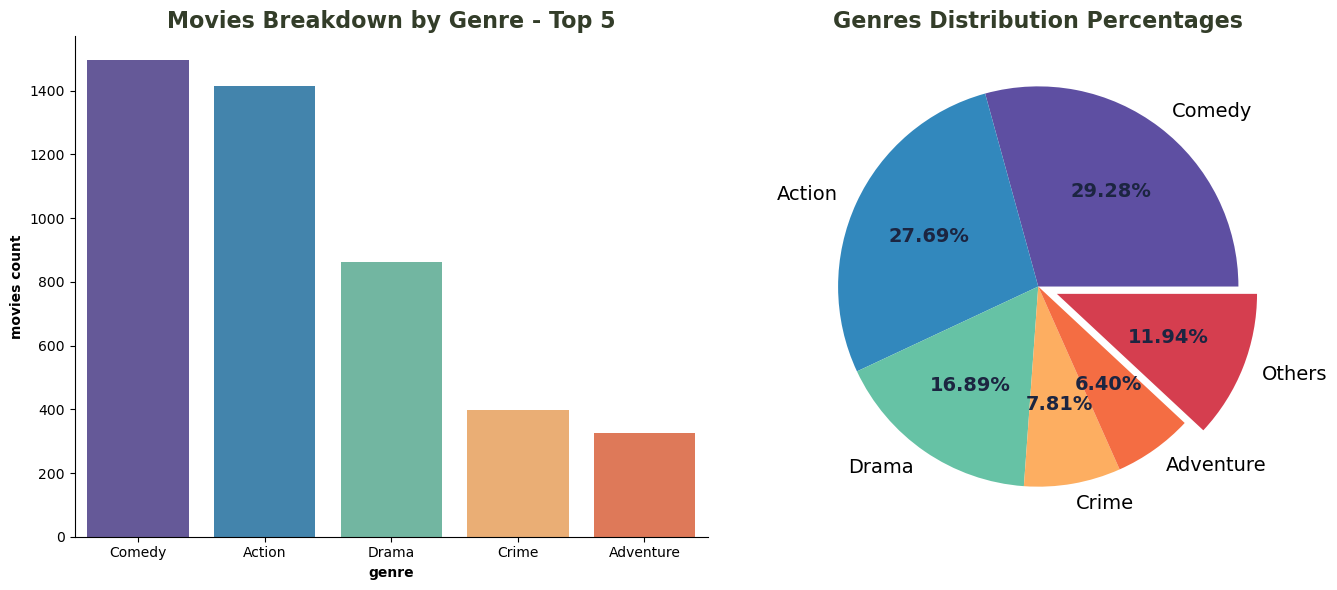

In [34]:
# Getting some insight on movie genres

df_gnr = pd.DataFrame(df_full['genre'].value_counts().reset_index().values, columns=["genre", "total"])
df_gnr_top5 = df_gnr.head(5)

fig_gnr, axes_gnr = plt.subplots(nrows=1, ncols=2, figsize=(14,6), layout ='tight')

ax_gnr = sns.barplot(data=df_gnr_top5, x='genre', y='total', ax=axes_gnr[0],
                     palette=['#5e4fa2', '#3288bd', '#66c2a5', '#fdae61', '#f46d43'])
ax_gnr.set_title('Movies Breakdown by Genre - Top 5', fontsize=16, weight=600, color='#333d29')
sns.despine()

df_gnr_top5.loc[len(df_gnr_top5)] = {'genre': 'Others', 'total':df_gnr[6:].sum()[1]}

plt.title('Genres Distribution Percentages', fontsize=16, weight=600, color='#333d29')
wedges, texts, autotexts = axes_gnr[1].pie(x=df_gnr_top5['total'], labels=df_gnr_top5['genre'], autopct='%.2f%%',
                                           textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1],
                                           colors=['#5e4fa2', '#3288bd', '#66c2a5', '#fdae61', '#f46d43', '#d53e4f'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes_gnr[0].set_xlabel('genre', weight=550)
axes_gnr[0].set_ylabel('movies count', weight=550)
axes_gnr[1].axis('off')

plt.show()

In [35]:
# INSIGHT: Comedy is the most dominant genre in the dataset with over 1400 movies, immediately followed by action movies.
#          Other movie genres that didn't make it to the top5 represent the 11.94% of the total movies count.

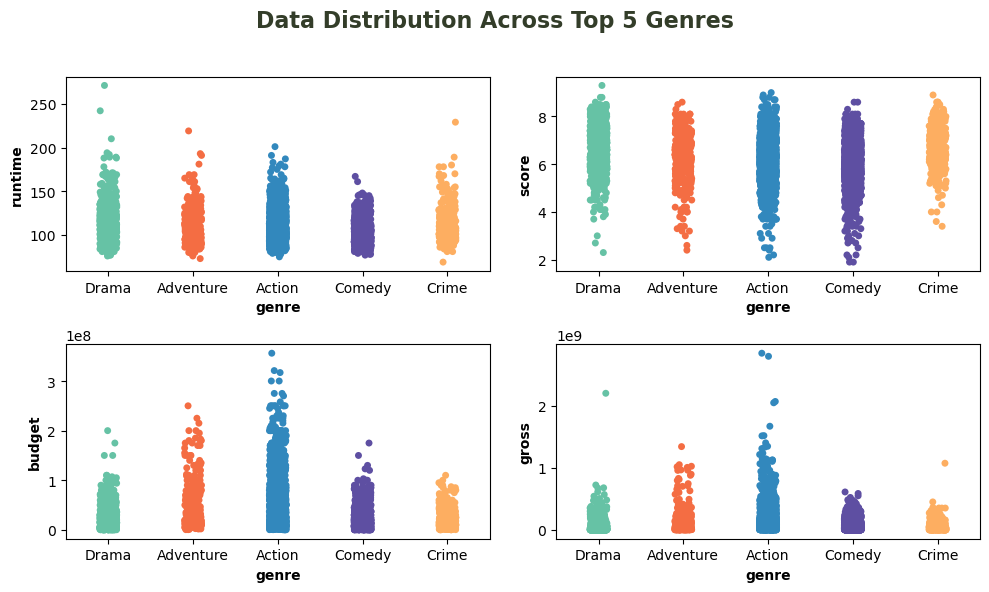

In [36]:
# Visualizing the data distribution of some movie features, for the movies whose genre is in the top 5.

df_plot = df_full[df_full['genre'].isin(df_gnr_top5['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6), layout = 'tight')

plt.suptitle('Data Distribution Across Top 5 Genres\n', fontsize=16, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'score', 'budget', 'gross']):
    sns.stripplot(data=df_plot, x='genre', y=y, ax=axes.flatten()[i], hue=df_plot['genre'], palette=['#66c2a5', '#f46d43', '#3288bd', '#5e4fa2', '#fdae61'], legend=False)
    axes.flatten()[i].set_xlabel('genre', weight=550)
axes.flatten()[0].set_ylabel('runtime', weight=550)
axes.flatten()[1].set_ylabel('score', weight=550)
axes.flatten()[2].set_ylabel('budget', weight=550)
axes.flatten()[3].set_ylabel('gross', weight=550)
plt.show()

In [37]:
# INSIGHT: The longest movie is a drama.
#          Most of the movies with a score lower than 4 are comedies or action movies.
#          The movie with the highest score is a drama.
#          Action movies tend to have a higher budget.
#          Action movies often generate higher revenue.

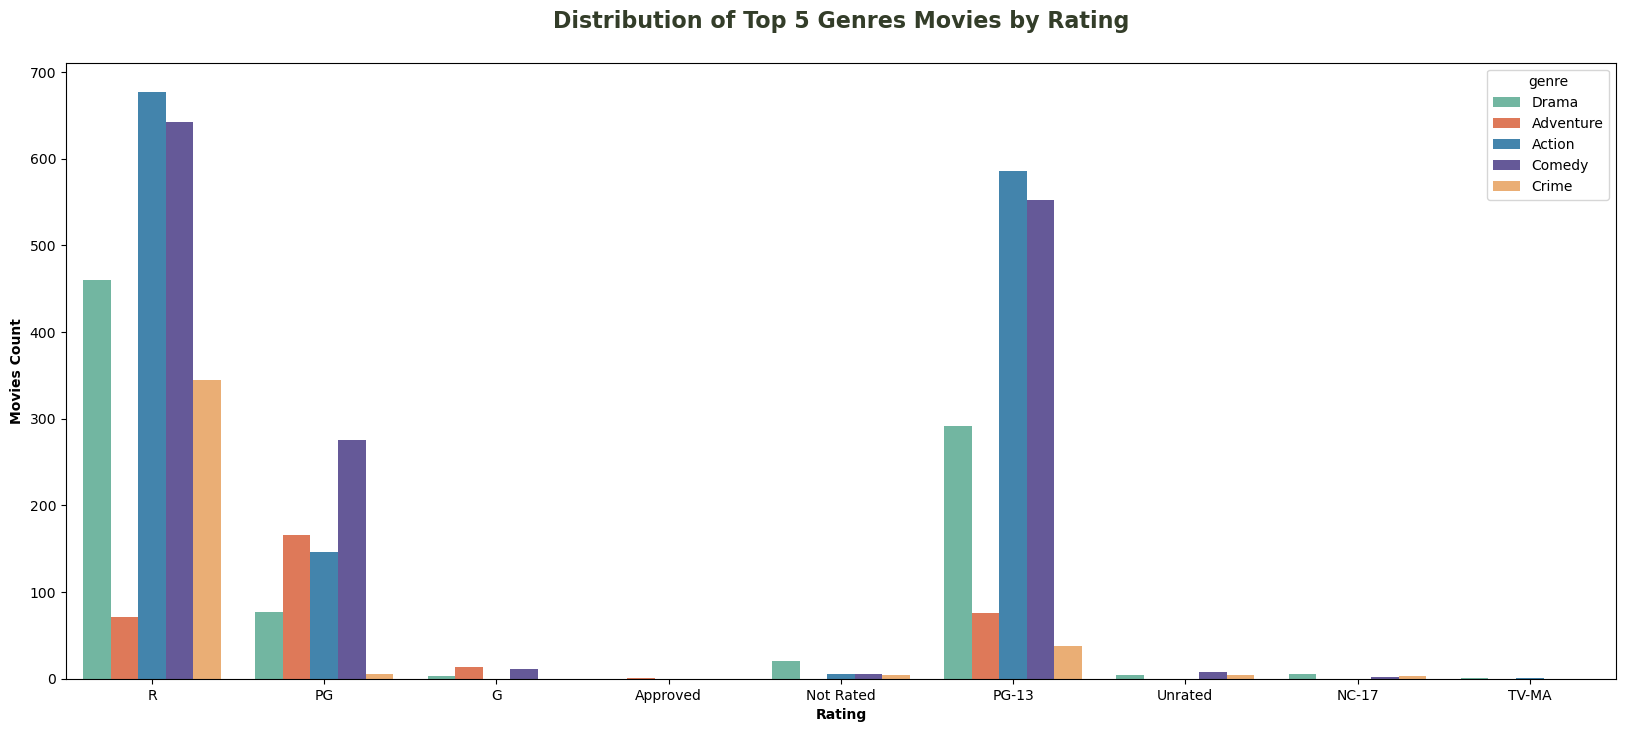

In [38]:
# Visualizing the data distribution of movie ratings, for the movies whose genre is in the top 5.

plt.figure(figsize = (20,8))
sns.countplot(data = df_plot, x = df_plot['rating'], hue=df_plot['genre'], palette=['#66c2a5', '#f46d43', '#3288bd', '#5e4fa2', '#fdae61'])
plt.title('Distribution of Top 5 Genres Movies by Rating\n', fontsize=16, weight=600, color='#333d29')
plt.xlabel('Rating', fontsize=10, weight=550)
plt.ylabel('Movies Count', fontsize=10, weight=550)
plt.show()

In [39]:
# INSIGHT: The majority of movies falls in one of the following categories: R, PG or PG-13 rated.

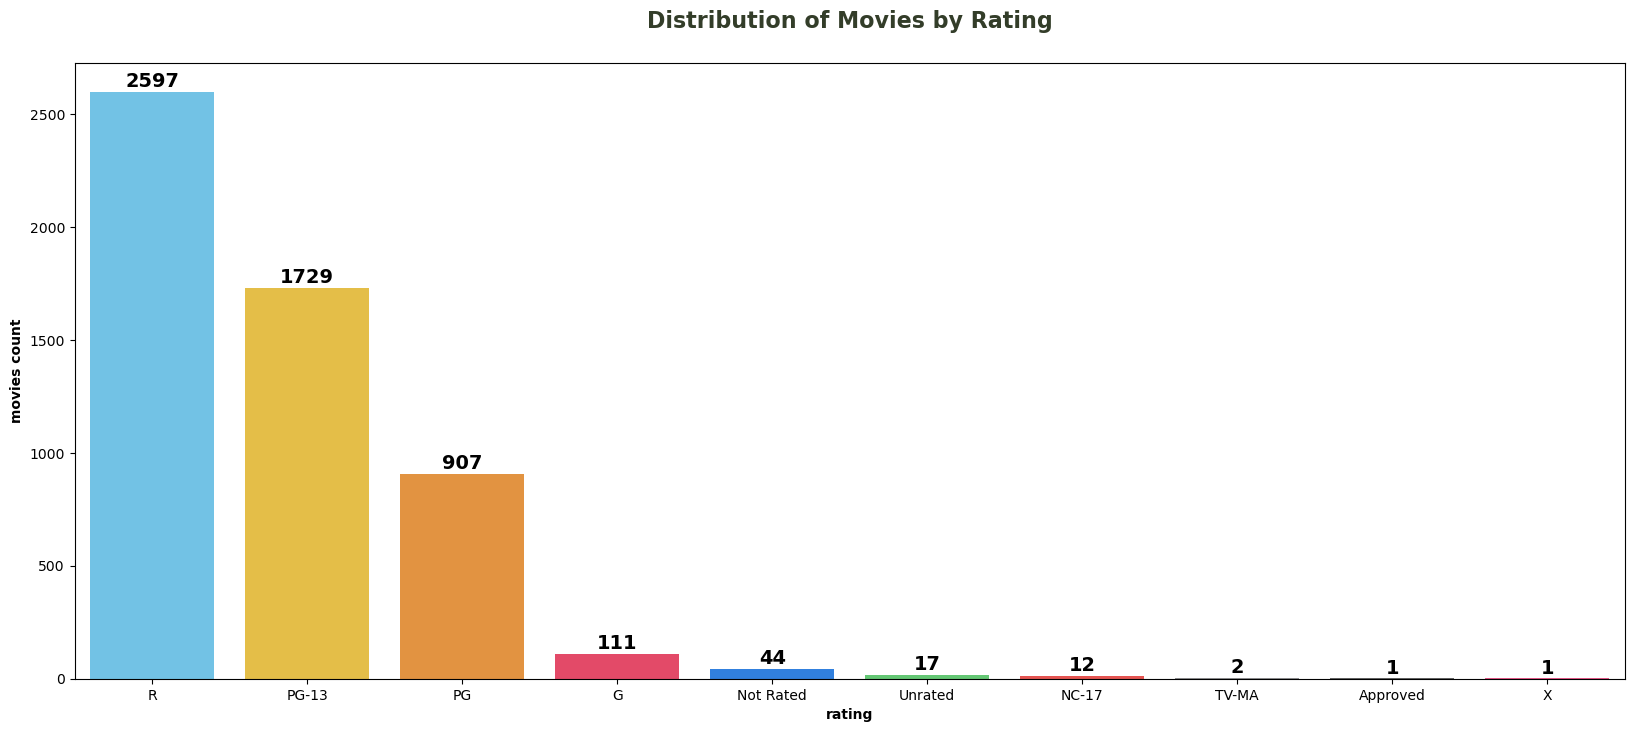

In [40]:
# Visually checking if the data distribution of movies ratings changes when considering all the movies from the dataset.

plt.figure(figsize=(20,8))
rating_count = df_full.value_counts(df_full['rating'])
rating_count_bars = sns.barplot(df_full, x = rating_count.index.tolist(), y = rating_count,
                                palette=['#5fc9f8', '#fecb2e', '#fd9426', '#fc3158', '#147efb', '#53d769', '#fc3d39', '#8e8e93', '#666666', '#ff4081'])

rectangles = rating_count_bars.patches
labels = (df_full.value_counts(df_full['rating'])).astype('str')

for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    rating_count_bars.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize = 14, weight=550)

plt.title('Distribution of Movies by Rating\n', fontsize=16, weight=600, color='#333d29')
plt.xlabel('rating', fontsize=10, weight=550)
plt.ylabel('movies count', fontsize=10, weight=550)
    
plt.show()

In [41]:
# INSIGHT: R, PG-13, PG are definitely the most common categories of movie ratings.

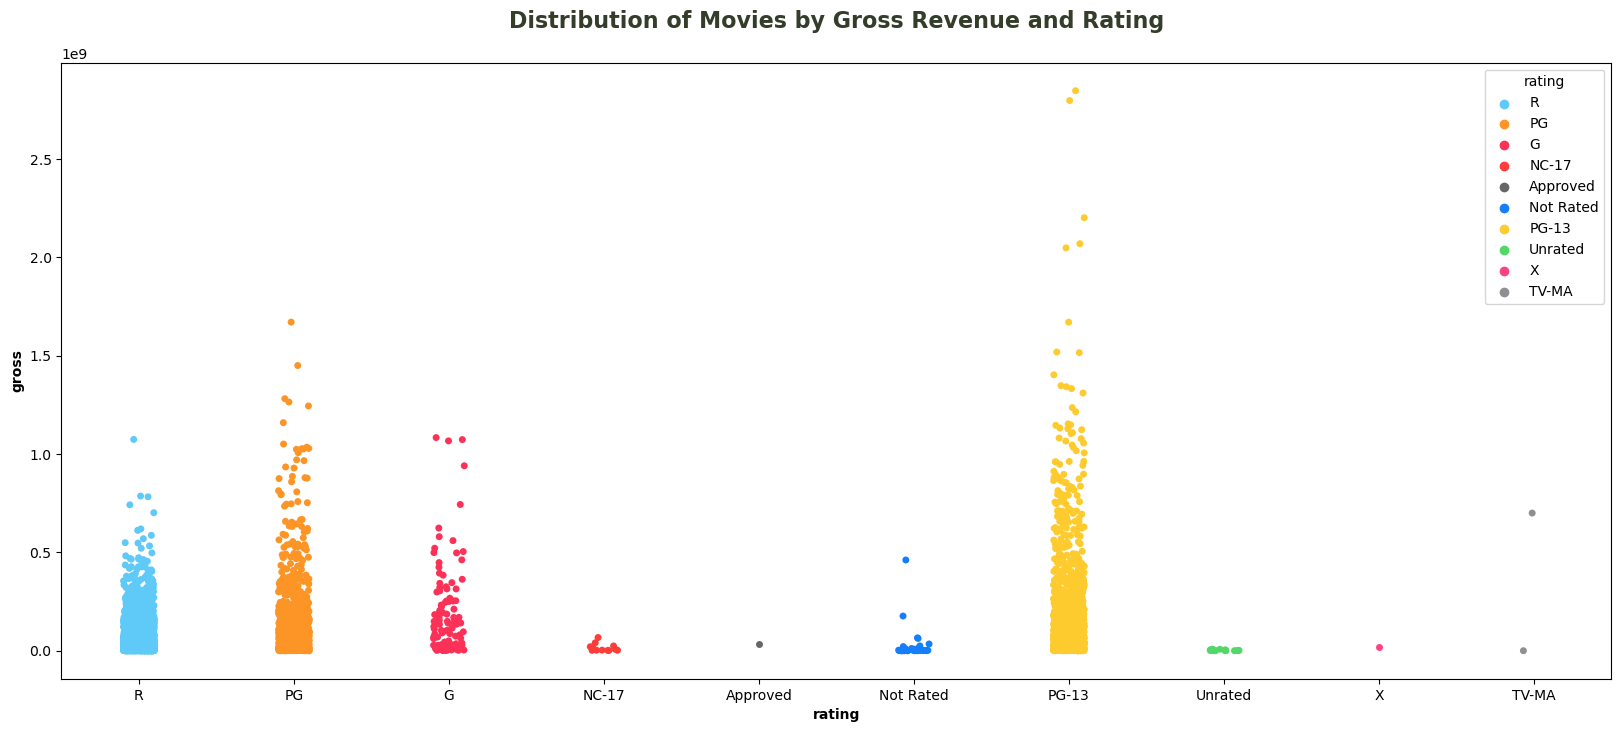

In [42]:
# Visualizing the movies distribution by gross revenue generated and rating.

plt.figure(figsize=(20,8))
sns.stripplot(data=df_full, x="rating", y="gross", hue=df_full['rating'],
              palette = ['#5fc9f8', '#fd9426', '#fc3158', '#fc3d39', '#666666', '#147efb', '#fecb2e', '#53d769', '#ff4081', '#8e8e93'], size= 5)
plt.title('Distribution of Movies by Gross Revenue and Rating\n', fontsize=16, weight=600, color='#333d29')
plt.xlabel('rating', fontsize=10, weight=550)
plt.ylabel('gross', fontsize=10, weight=550)
plt.show()

In [43]:
# INSIGHT: The top 5 grossing movies are all PG-13 rated.

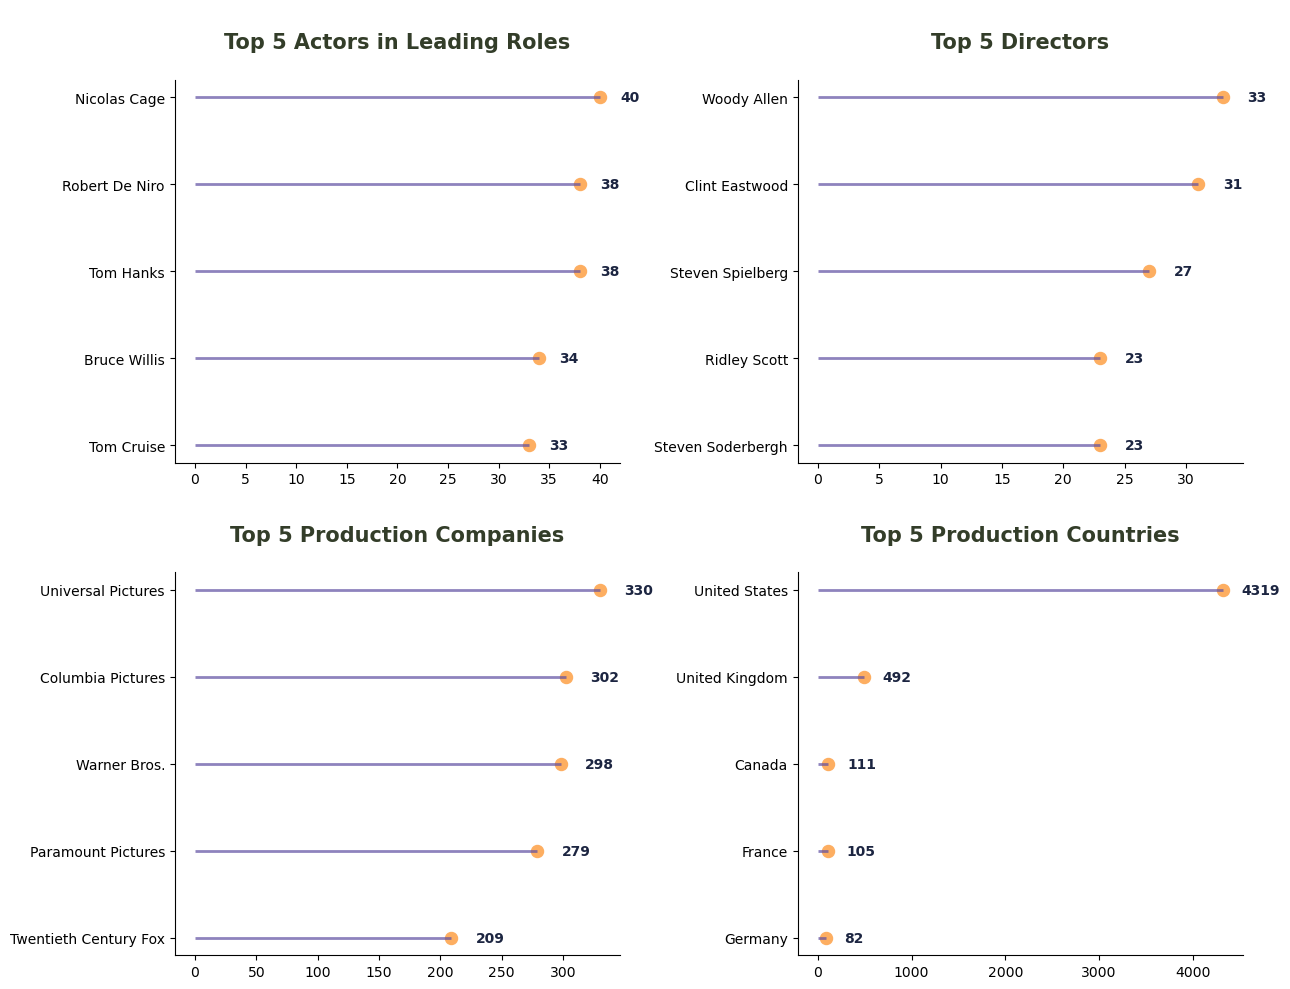

In [44]:
# Getting some insight on other movies' features.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10), layout='tight')


# Top 5 Actors 

df_actors = pd.DataFrame(df_full['star'].value_counts().reset_index().values, columns=["actor", "total"])
df_actors_top5 = df_actors.head(5)
df_actors_top5_sorted = df_actors_top5.sort_values(by='total', ascending=True)

axes[0,0].hlines(y=df_actors_top5_sorted['actor'], xmin=0, xmax=df_actors_top5_sorted['total'], color= '#5e4fa2', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_actors_top5_sorted['total'], y=df_actors_top5_sorted['actor'], s = 75, color='#fdae61')
axes[0,0].set_title('\nTop 5 Actors in Leading Roles\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_actors_top5_sorted['total']):
    axes[0,0].text(value+2, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

    
# Top 5 Directors

df_directors = pd.DataFrame(df_full['director'].value_counts().reset_index().values, columns=["director", "total"])
df_directors_top5 = df_directors.head(5)
df_directors_top5_sorted = df_directors_top5.sort_values(by='total', ascending=True)

axes[0,1].hlines(y=df_directors_top5_sorted['director'], xmin=0, xmax=df_directors_top5_sorted['total'], color= '#5e4fa2', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_directors_top5_sorted['total'], y=df_directors_top5_sorted['director'], s = 75, color='#fdae61')
axes[0,1].set_title('\nTop 5 Directors\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_directors_top5_sorted['total']):
    axes[0,1].text(value+2, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
    
# Top 5 Companies

df_companies = pd.DataFrame(df_full['company'].value_counts().reset_index().values, columns=["company", "total"])
df_companies_top5 = df_companies.head(5)
df_companies_top5_sorted = df_companies_top5.sort_values(by='total', ascending=True)

axes[1,0].hlines(y=df_companies_top5_sorted['company'], xmin=0, xmax=df_companies_top5_sorted['total'], color= '#5e4fa2', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_companies_top5_sorted['total'], y=df_companies_top5_sorted['company'], s = 75, color='#fdae61')
axes[1,0].set_title('\nTop 5 Production Companies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_companies_top5_sorted['total']):
    axes[1,0].text(value+20, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

    
# Top 5 Countries
df_countries = pd.DataFrame(df_full['country'].value_counts().reset_index().values, columns=["country", "total"])
df_countries_top5 = df_countries.head(5)
df_countries_top5_sorted = df_countries_top5.sort_values(by='total', ascending=True)

axes[1,1].hlines(y=df_countries_top5_sorted['country'], xmin=0, xmax=df_countries_top5_sorted['total'], color= '#5e4fa2', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_countries_top5_sorted['total'], y=df_countries_top5_sorted['country'], s = 75, color='#fdae61')
axes[1,1].set_title('\nTop 5 Production Countries\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_countries_top5_sorted['total']):
    axes[1,1].text(value+200, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

sns.despine()
plt.show()

In [45]:
# INSIGHT: Nicolas Cage has played the main role in the majority of movies listed in the database.
#          Woody Allen has directed the majority of movies listed in the database.
#          Universal Pictures has produced the majority of movies listed in the database.
#          Most of the production companies are based in the USA.

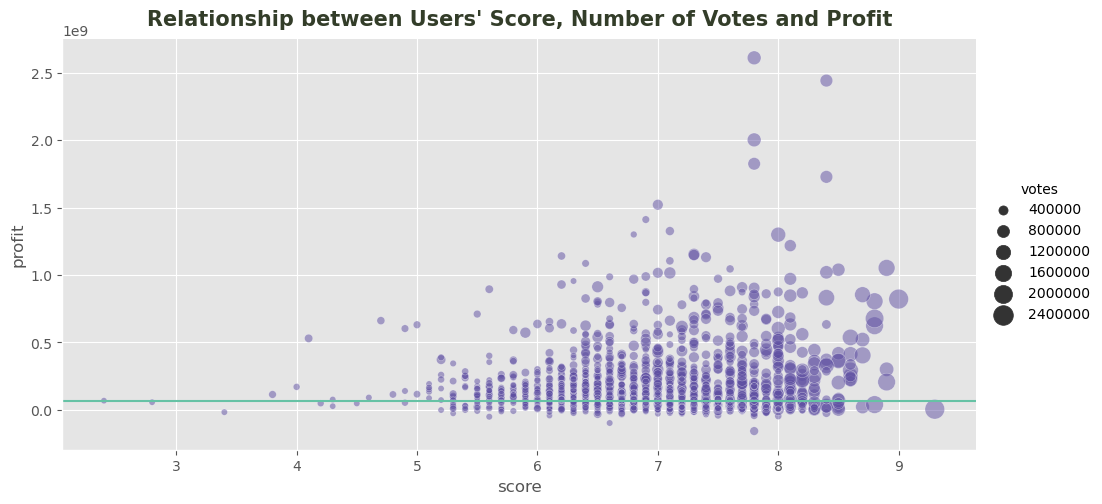

In [46]:
# Investigating on the relationship between users' score, number of votes and gross profit generated

df_score_profit = df_full.copy()
df_score_profit['profit'] = df_score_profit['gross'] - df_score_profit['budget']
df_score_profit_highvotes = df_score_profit[df_score_profit['votes'] > 100000]

with plt.style.context('ggplot'):  
    sns.relplot(data=df_score_profit_highvotes, x='score', y='profit', size='votes',
                sizes=(20, 200), alpha=.5, aspect=2, color='#5e4fa2')
    plt.axhline(y=np.nanmean(df_score_profit['profit']), color='#66c2a5')

plt.title("Relationship between Users' Score, Number of Votes and Profit", fontsize=15, weight=600, color='#333d29', pad=10)
plt.show()

In [47]:
# INSIGHT: Movies that received a very low rating also had a small number of votes.
#          Higher number of votes and higher ratings are often associated with above-the-average profits (green line).
#          However, there are a few movies who received a lot of votes and have high scores, but generated low profits.